In [1]:
# import
# read in csv

# data cleaning:
# dataFrame
# trim down the columns to [calories, sugar, sodium, cholesterol, trans fat]

# food to analyze:

# Salads: full menu
# grilled chicken wraps: entree chick cool wrap for McDonald (grilled)
# yogurt parfait 


# Fries
# Chicken nuggets
# chicken sandwich
# milk shake
# McDonald's smoothie has a lot less calories than its milkshakes - better dessert alternative; chick fil a doesn't have any.


# egg white sandwich
# hashbrowns
# sausage, cheese and egg muffin
# bacon, egg and cheese biscuit
# *burrito 

# price: append a price column, st. louis price data


# bar charts


In [2]:
# import
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# read in csv
McDonald_menu = os.path.join("..", "Resources", "mcdonald_menu.csv")

# Read Data files with the pandas library
McDonald_menu_df = pd.read_csv(McDonald_menu)

McDonald_menu_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
Chick_fil_a_menu = os.path.join("..", "Resources", "chick_fil_a_menu.csv")

Chick_fil_a_menu_df = pd.read_csv(Chick_fil_a_menu, encoding="ISO-8859-1")

Chick_fil_a_menu_df.head()

,Categories,Menu Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Fiber (g),Sugar (g),Protein (g)
0,Breakfast,Chick-fil-A Chicken Biscuit,450,190,21,8,0,35,1310,50,4,5,17
1,Breakfast,Chick-n-Minis (4-count),350,120,13,35,0,55,860,38,2,7,19
2,Breakfast,Egg White Grill,300,70,7,3,0,55,970,31,1,1,25
3,Breakfast,"Bacon, Egg & Cheese Biscuit",420,190,21,11,0,170,1240,40,2,1,15
4,Breakfast,"Sausage, Egg & Cheese Biscuit",600,360,40,18,0,200,1520,41,3,1,20


In [4]:
# Remove unecessary columns from the McDonald menu and save the new DataFrame
reduced_mc_df = McDonald_menu_df[["Category", "Item", "Calories", "Sugars", "Sodium", "Cholesterol",
                       "Trans Fat"]]
reduced_mc_df.head()

,Category,Item,Calories,Sugars,Sodium,Cholesterol,Trans Fat
0,Breakfast,Egg McMuffin,300,3,750,260,0.0
1,Breakfast,Egg White Delight,250,3,770,25,0.0
2,Breakfast,Sausage McMuffin,370,2,780,45,0.0
3,Breakfast,Sausage McMuffin with Egg,450,2,860,285,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,400,2,880,50,0.0


In [5]:
# Remove unecessary columns from the Chick fil a menu and save the new DataFrame
reduced_chick_df = Chick_fil_a_menu_df[["Categories", "Menu Item", "Calories", "Sugar (g)", "Sodium (mg)", "Cholesterol (mg)",
                       "Trans Fat (g)"]]
reduced_chick_df.head()

,Categories,Menu Item,Calories,Sugar (g),Sodium (mg),Cholesterol (mg),Trans Fat (g)
0,Breakfast,Chick-fil-A Chicken Biscuit,450,5,1310,35,0
1,Breakfast,Chick-n-Minis (4-count),350,7,860,55,0
2,Breakfast,Egg White Grill,300,1,970,55,0
3,Breakfast,"Bacon, Egg & Cheese Biscuit",420,1,1240,170,0
4,Breakfast,"Sausage, Egg & Cheese Biscuit",600,1,1520,200,0


In [6]:
# rename Chick fil a columns to match McDonald's
renamed_chick_df = reduced_chick_df.rename(columns={"Sugar (g)": "Sugars",
                                        "Sodium (mg)": "Sodium",
                                        "Cholesterol (mg)": "Cholesterol",
                                        "Trans Fat (g)": "Trans Fat",
                                        "Menu Item": "Item"
                                        })
renamed_chick_df.head()

,Categories,Item,Calories,Sugars,Sodium,Cholesterol,Trans Fat
0,Breakfast,Chick-fil-A Chicken Biscuit,450,5,1310,35,0
1,Breakfast,Chick-n-Minis (4-count),350,7,860,55,0
2,Breakfast,Egg White Grill,300,1,970,55,0
3,Breakfast,"Bacon, Egg & Cheese Biscuit",420,1,1240,170,0
4,Breakfast,"Sausage, Egg & Cheese Biscuit",600,1,1520,200,0


In [7]:
# Keep only the identified menu items from McDonald's menu
reduced_mc_df[reduced_mc_df['Category'].str.match("Salads")]

reduced_mc_df_1 = reduced_mc_df[reduced_mc_df['Category'].str.match("Salads")]

reduced_mc_df_1


,Category,Item,Calories,Sugars,Sodium,Cholesterol,Trans Fat
84,Salads,Premium Bacon Ranch Salad (without Chicken),140,4,300,25,0.0
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,380,5,860,70,0.0
86,Salads,Premium Bacon Ranch Salad with Grilled Chicken,220,4,690,85,0.0
87,Salads,Premium Southwest Salad (without Chicken),140,6,150,10,0.0
88,Salads,Premium Southwest Salad with Crispy Chicken,450,12,850,50,0.0
89,Salads,Premium Southwest Salad with Grilled Chicken,290,10,680,70,0.0


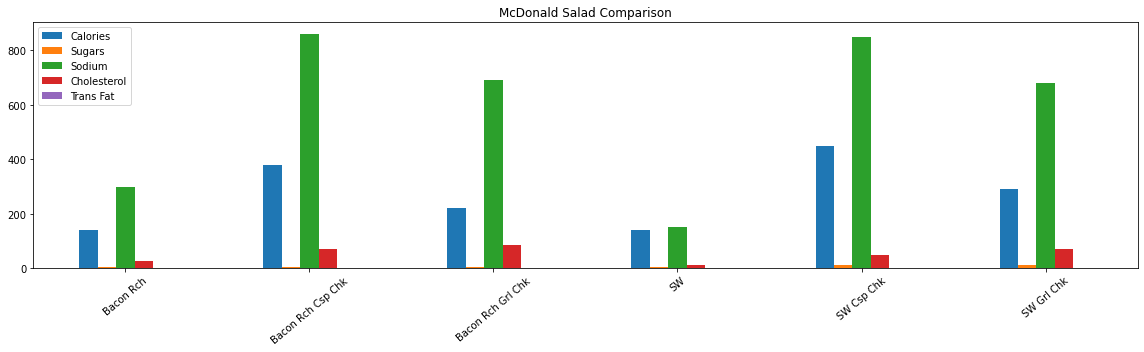

In [8]:
pl_mc = reduced_mc_df_1.plot.bar(width = .5, figsize=(16,5))
plt.title("McDonald Salad Comparison")
tick_locations = (0,1,2,3,4,5)
plt.xticks(tick_locations, ["Bacon Rch", "Bacon Rch Csp Chk", "Bacon Rch Grl Chk", "SW", "SW Csp Chk", "SW Grl Chk"])

plt.xticks(rotation=40)

plt.tight_layout()
plt.savefig("../Resources/mc_salad")
plt.show()

In [9]:
# Keep only the identified menu items from Chick fli a's menu
renamed_chick_df[renamed_chick_df['Categories'].str.match("Salads")]

renamed_chick_df_1 = renamed_chick_df[renamed_chick_df['Categories'].str.match("Salads")]

renamed_chick_df_1

,Categories,Item,Calories,Sugars,Sodium,Cholesterol,Trans Fat
26,Salads,Grilled Market Salad,200,8,650,60,0
27,Salads,Grilled Market Salad w/Toppings,330,12,690,65,0
28,Salads,Cobb Salad,430,5,1290,155,0
29,Salads,Cobb Salad w/Toppings,510,6,1360,155,0
30,Salads,Spicy Southwest Salad,290,7,970,75,0
31,Salads,Spicy Southwest Salad w/Toppings,450,8,1070,75,0


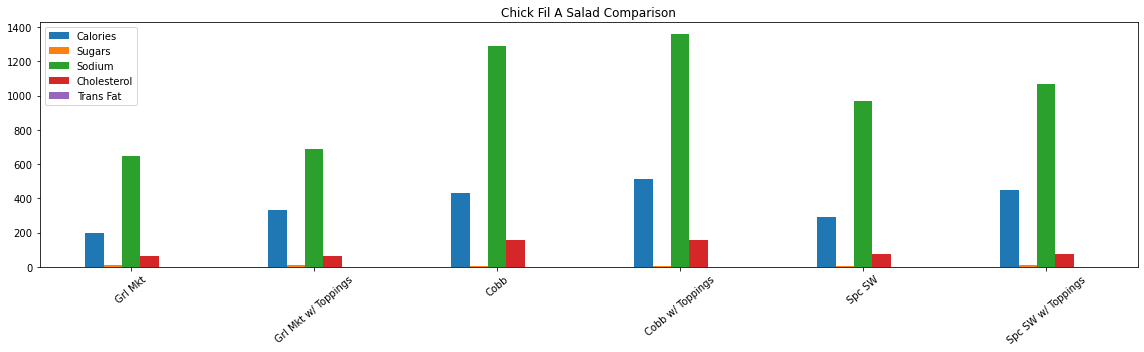

In [10]:
pl_chick = renamed_chick_df_1.plot.bar(width = .5, figsize=(16,5))
plt.title("Chick Fil A Salad Comparison")
tick_locations = (0,1,2,3,4,5)
plt.xticks(tick_locations, ["Grl Mkt", "Grl Mkt w/ Toppings", "Cobb", "Cobb w/ Toppings", "Spc SW", "Spc SW w/ Toppings"])

plt.xticks(rotation=40)

plt.tight_layout()
plt.savefig("../Resources/chick_salad")
plt.show()

In [11]:
# notes for Saturday:
# get the average data into either dataFrames or lists so we can call them into the bar plot code X
# plot the group bar chart X

# repeat the same steps for popular items

# repeat the same steps for breakfast items

# spend the rest of the time to discuss presentation

In [18]:
# set new mc_index to Item
popular_mc_df = reduced_mc_df.set_index("Item")
popular_mc_df.head()

,Category,Calories,Sugars,Sodium,Cholesterol,Trans Fat
Item,,,,,,
Egg McMuffin,Breakfast,300,3,750,260,0.0
Egg White Delight,Breakfast,250,3,770,25,0.0
Sausage McMuffin,Breakfast,370,2,780,45,0.0
Sausage McMuffin with Egg,Breakfast,450,2,860,285,0.0
Sausage McMuffin with Egg Whites,Breakfast,400,2,880,50,0.0


In [19]:
rows = ["Medium French Fries", "McChicken", "Vanilla Shake (Small)", "Chocolate Shake (Small)", "Strawberry Shake (Small)"]
popular_mc_df.loc[rows]

,Category,Calories,Sugars,Sodium,Cholesterol,Trans Fat
Item,,,,,,
Medium French Fries,Snacks & Sides,340,0,190,0,0.0
McChicken,Chicken & Fish,360,5,800,35,0.0
Vanilla Shake (Small),Smoothies & Shakes,530,63,160,60,1.0
Chocolate Shake (Small),Smoothies & Shakes,560,77,240,60,1.0
Strawberry Shake (Small),Smoothies & Shakes,550,79,160,60,1.0


In [20]:
# set new chick_index to Item
popular_chick_df = renamed_chick_df.set_index("Item")
popular_chick_df.head()

,Categories,Calories,Sugars,Sodium,Cholesterol,Trans Fat
Item,,,,,,
Chick-fil-A Chicken Biscuit,Breakfast,450,5,1310,35,0
Chick-n-Minis (4-count),Breakfast,350,7,860,55,0
Egg White Grill,Breakfast,300,1,970,55,0
"Bacon, Egg & Cheese Biscuit",Breakfast,420,1,1240,170,0
"Sausage, Egg & Cheese Biscuit",Breakfast,600,1,1520,200,0


In [21]:
rows = ["Waf?e Potato Fries w/Sea Salt (Med)", "Chick-fil-A Chicken Sandwich", "Vanilla Milkshake (Sm)", "Chocolate Milkshake (Sm)", "Strawberry Milkshake (Sm)"]
popular_chick_df.loc[rows]

,Categories,Calories,Sugars,Sodium,Cholesterol,Trans Fat
Item,,,,,,
Waf?e Potato Fries w/Sea Salt (Med),Sides,360,0,280,0,0
Chick-fil-A Chicken Sandwich,Original and Grilled Entrees,440,5,1350,60,0
Vanilla Milkshake (Sm),Treats,500,66,370,70,0
Chocolate Milkshake (Sm),Treats,560,79,380,70,0
Strawberry Milkshake (Sm),Treats,570,77,380,70,0
